<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/%EB%8B%B9%EB%87%A8_4%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv("/content/gdrive/MyDrive/자료/diabetes.csv")


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

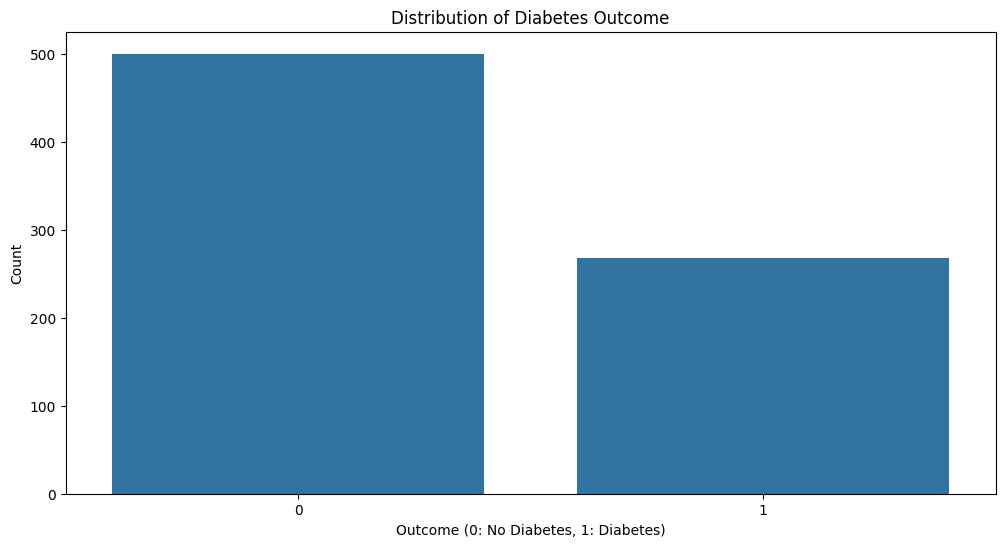

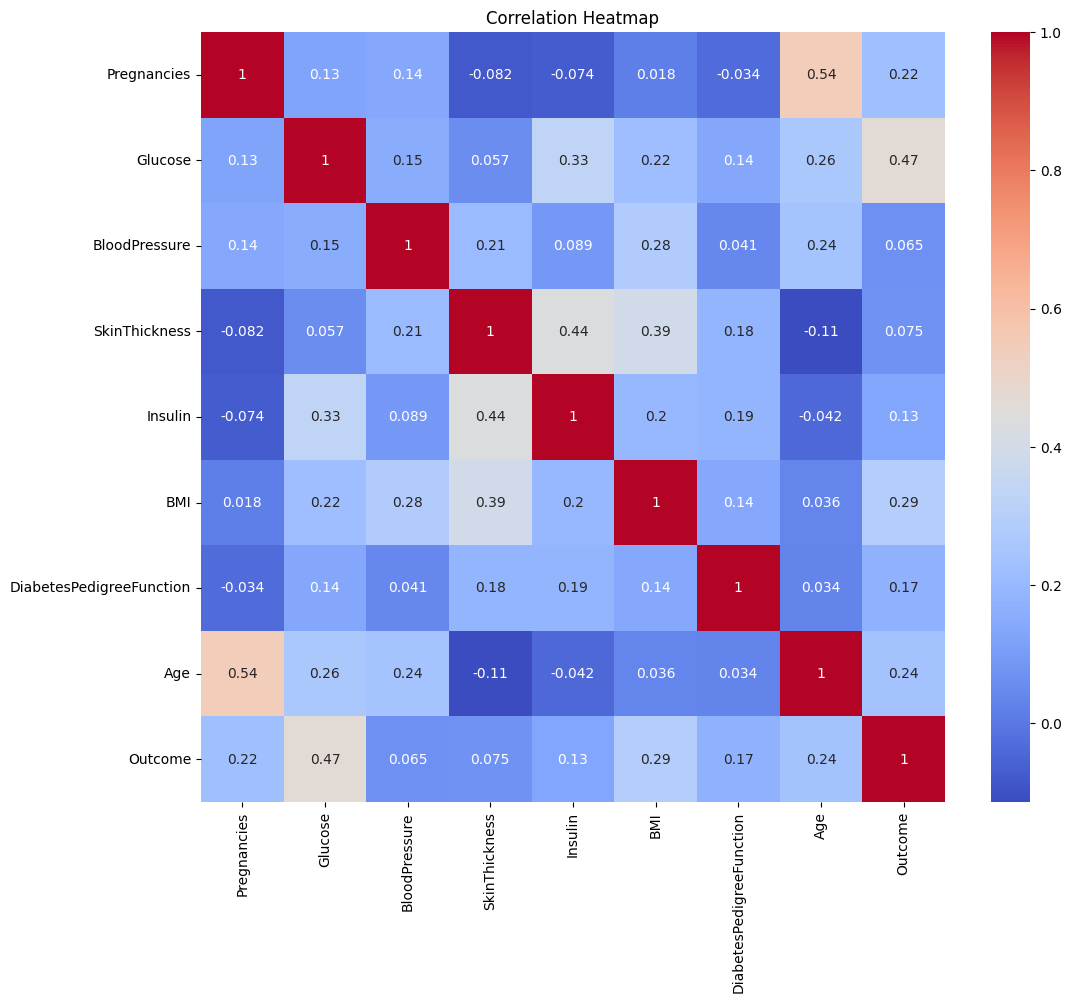

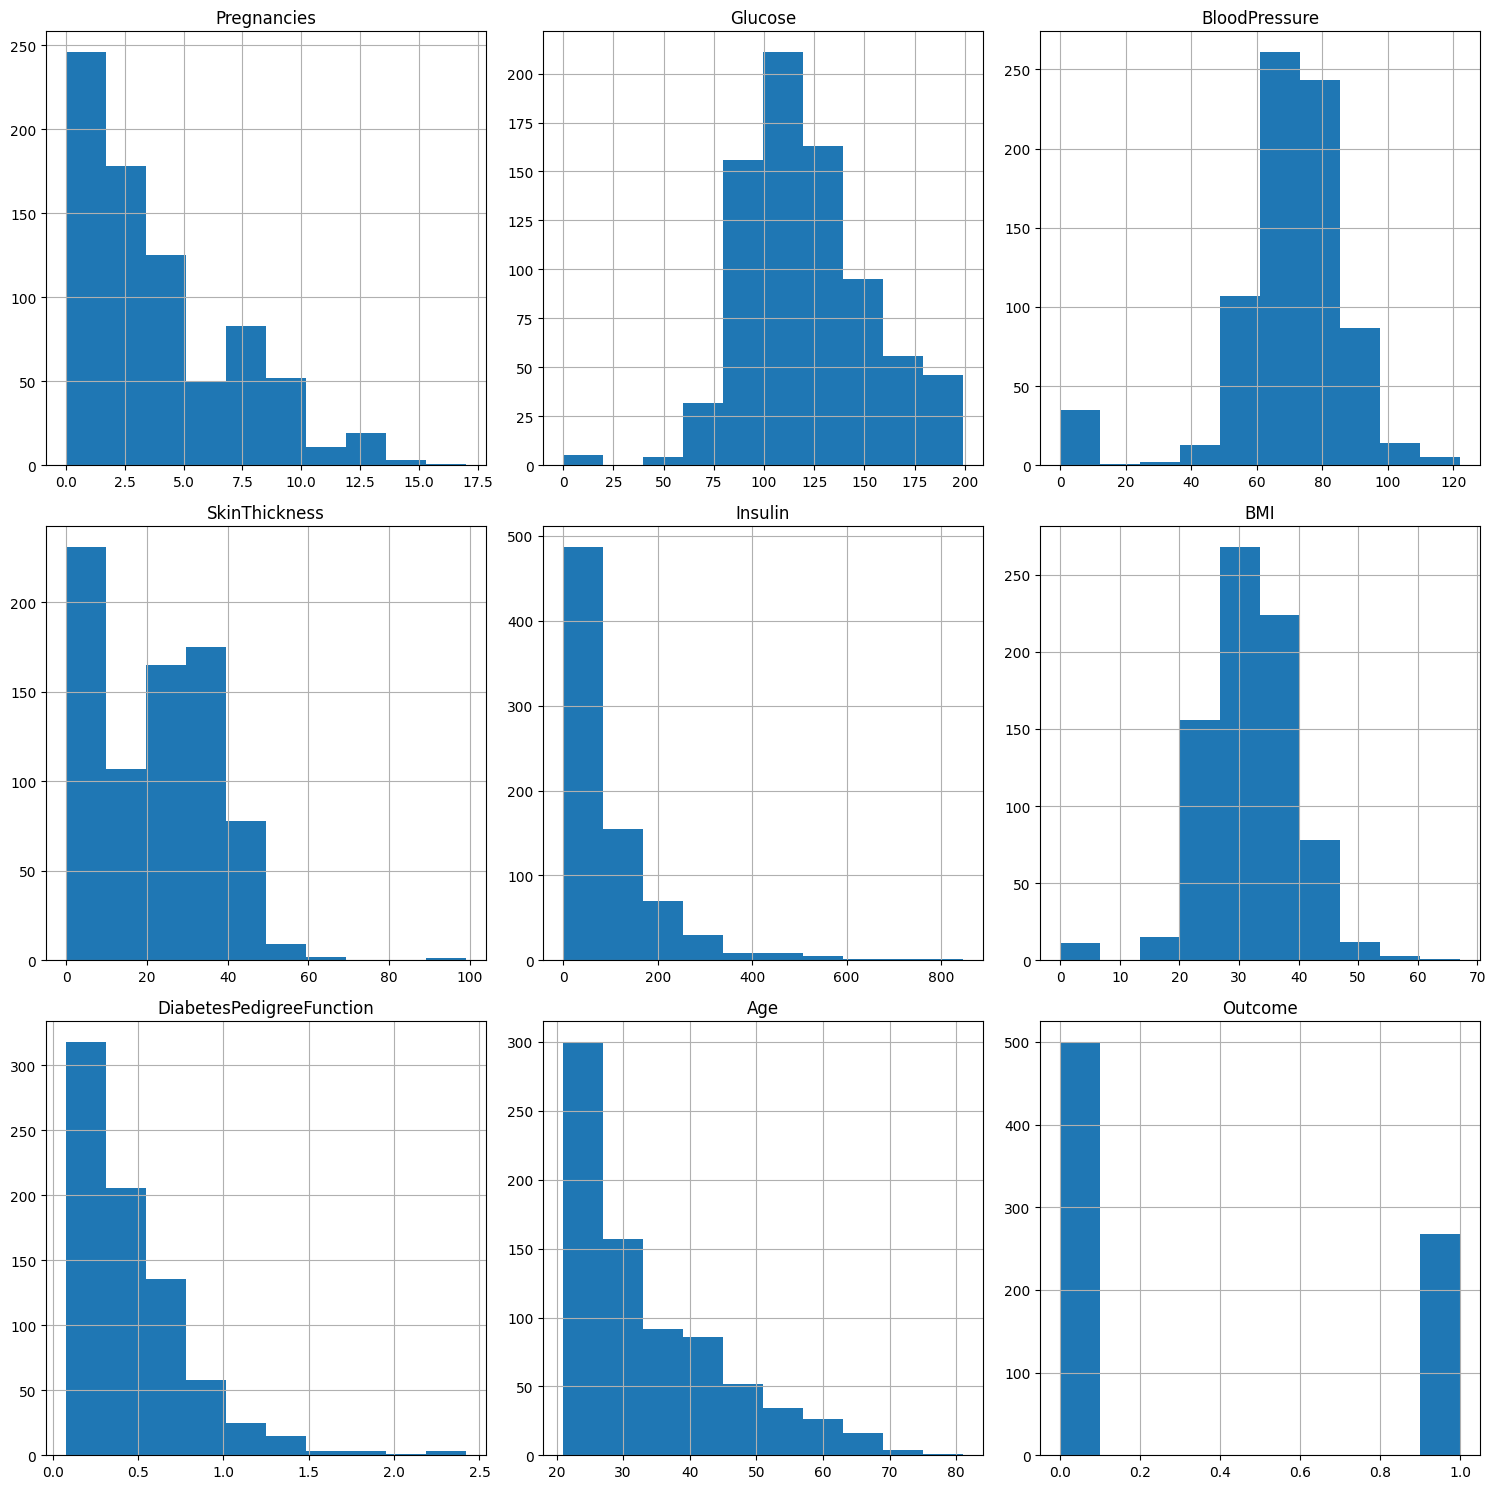

In [6]:
# 타겟 변수 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 특성별 분포 확인
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


In [7]:
# 특성과 타겟 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 데이터 reshape (CNN 입력용)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(8, 1)),
        tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [9]:
# CNN 모델 생성 및 학습
cnn_model = create_cnn_model()
history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6447 - loss: 0.6652 - val_accuracy: 0.6341 - val_loss: 0.6498
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6912 - loss: 0.5956 - val_accuracy: 0.7236 - val_loss: 0.6136
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7408 - loss: 0.5659 - val_accuracy: 0.7154 - val_loss: 0.6030
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7523 - loss: 0.5519 - val_accuracy: 0.7154 - val_loss: 0.5958
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7163 - loss: 0.5706 - val_accuracy: 0.7154 - val_loss: 0.5893
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7436 - loss: 0.5412 - val_accuracy: 0.7154 - val_loss: 0.5735
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7233 - loss: 0.5552 - val_accuracy: 0.7154 - val_loss: 0.5842
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7337 - loss: 0.5166 - val_accuracy: 0.7480 - v

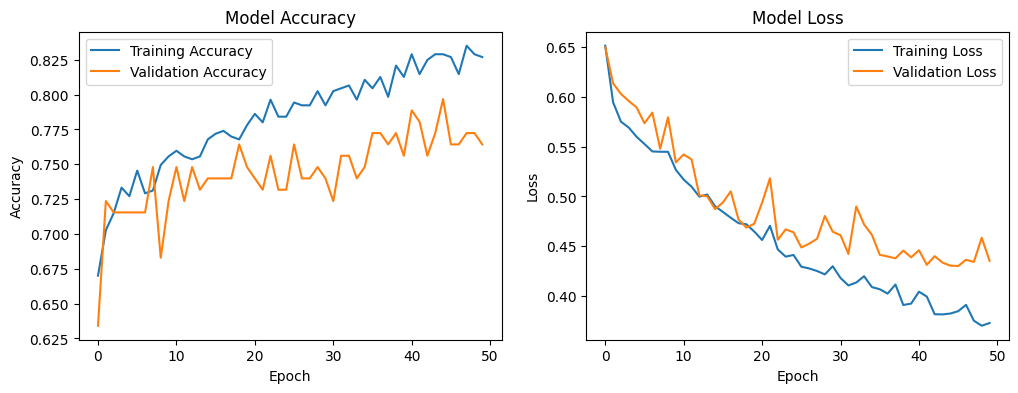

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
# 모델 저장
cnn_model.save('/content/gdrive/MyDrive/자료/diabetes_cnn_model.h5')

# 테스트 세트에서 성능 평가
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 0.5762 
Test accuracy: 0.7727


In [12]:
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
base_model = load_model('/content/gdrive/MyDrive/자료/diabetes_cnn_model.h5')

# 모델 구조 확인
base_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 4, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,563 (41.27 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

new_model = Sequential(base_model.layers)
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))


In [14]:
# 기존 층들을 동결 (가중치 업데이트 방지)
for layer in base_model.layers:
    layer.trainable = False

# 새로 추가된 층은 학습 가능 상태로 유지됩니다.

# 모델 컴파일
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
from sklearn.model_selection import train_test_split

# 훈련 데이터에서 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 학습
history = new_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=10, batch_size=32)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6551 - loss: 0.6904 - val_accuracy: 0.6911 - val_loss: 0.6773
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7562 - loss: 0.6734 - val_accuracy: 0.8130 - val_loss: 0.6618
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8274 - loss: 0.6603 - val_accuracy: 0.8211 - val_loss: 0.6466
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8250 - loss: 0.6453 - val_accuracy: 0.8211 - val_loss: 0.6294
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7976 - loss: 0.6321 - val_accuracy: 0.8211 - val_loss: 0.6105
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8459 - loss: 0.6086 - val_accuracy: 0.8211 - val_loss: 0.5892
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8366 - loss: 0.5874 - val_accuracy: 0.8293 - val_loss: 0.5667
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8179 - loss: 0.5715 - val_accuracy: 0.8211 - val_

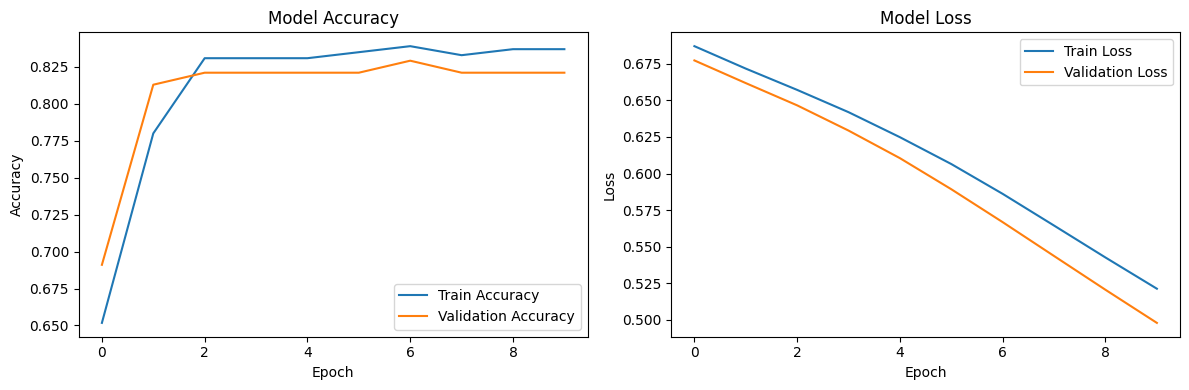

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



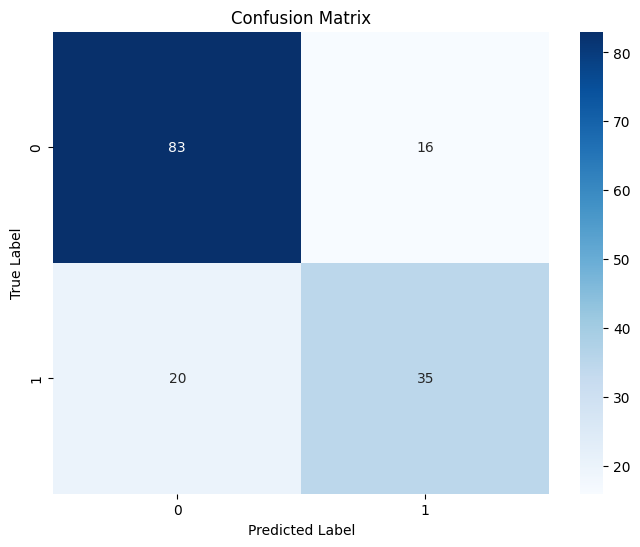

In [19]:
# 테스트 세트에 대한 예측 (X_test가 정의되어 있다고 가정)
y_pred = new_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# 분류 보고서 출력
print(classification_report(y_test, y_pred_classes))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [21]:
# 모델 저장
new_model.save('/content/gdrive/MyDrive/자료/fine_tuned_diabetes_model.h5')

print("미세조정된 모델이 저장되었습니다.")


미세조정된 모델이 저장되었습니다.
